+ Our gauge potential is given by: $  A_{\lambda}^{nm}= -i \hbar \dfrac{\partial_{\lambda}H^{nm}}{\omega_{nm}^2 + \mu^2} \omega_{nm}$
+ For non-zero $\mu$, gauge potential is an approximate one.

In [2]:
from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis
import numpy as np # generic math functions
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
def Ham_nonint(L):
    basis = spin_basis_1d(L)
    hz=(np.sqrt(5)+1)/4 #parameters used by Kim and Huse
    hx=(np.sqrt(5)+5)/8
    J=1.0
    hz_arr = [[hz,i] for i in range(L)] # OBC
    hx_arr = [[hx,i] for i in range(L)] # OBC
    J_arr = [[J,i,(i+1)%L] for i in range(L)] # PBC
    
    # static and dynamic lists
    static = [["xx",J_arr],["z",hz_arr], ["x",hx_arr] ]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return H

def Ham_int(L):
    basis = spin_basis_1d(L)
    hz=-0.0#(np.sqrt(5)+1)/4 #parameters used by Kim and Huse
    J=-1.0
    hz_arr = [[hz,i] for i in range(L)] # OBC
    J_arr = [[J,i,(i+1)%L] for i in range(L)] # PBC
    
    # static and dynamic lists
    static = [["xx",J_arr],["z",hz_arr]]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return H

def del_lambda_Ham(L):
    basis = spin_basis_1d(L)  
    hx_lamb=-1.0
    hx_lamb_arr=np.zeros(L)
    hx_lamb_arr[0]=hx_lamb
    hx_lamb_arr = [[hx_lamb_arr[i],i] for i in range(L)] # OBC
    static_lamb = [["z",hx_lamb_arr]]
    dynamic_lamb =[]
    op_lamb=hamiltonian(static_lamb,dynamic_lamb,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return op_lamb

def norm(A_lamb):    
    return np.linalg.norm(A_lamb, 'fro')

In [61]:
def guage_potent_mu(Ham,L, mu):
    E,V= Ham.eigh()
    op_lamb= del_lambda_Ham(L)
    wij = np.outer(E,np.ones(2**L))-np.outer(np.ones(2**L),E)
    num_lamb = np.dot(V,np.dot(op_lamb.toarray(),np.conj(V)))
    A_lamb = -1j*num_lamb*wij/(wij**2+ mu**2)
    return A_lamb

In [20]:
a = np.arange(16).reshape(4, 4)
print a
iu = np.triu_indices(4,1)
print a[iu]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[ 1  2  3  6  7 11]


### Energy level distribution
I would like to verify/check if there are more degenerate eigenvalues for integrable model compared to non-integrable model.

In [51]:
L=10
H=Ham_int(L)
E_int,V= H.eigh()
wij_int = np.outer(E_int,np.ones(2**L))-np.outer(np.ones(2**L),E_int)
index_lower = np.tril_indices(2**L,-1) #picking up indexes of lower triangle
#print wij_int
#print wij_int[index_lower]
H=Ham_nonint(L)
E_nonint,V_nonint= H.eigh()
wij_nonint = np.outer(E_nonint,np.ones(2**L))-np.outer(np.ones(2**L),E_nonint)

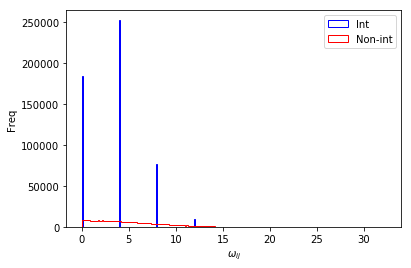

In [52]:
count, bins, ignored = plt.hist(wij_int[index_lower],'auto', color='b',histtype='step', label='Int')
count_nonint, bins_nonint, ignored_nonint = plt.hist(wij_nonint[index_lower],'auto', color='r',histtype='step', label='Non-int')
plt.ylabel(r'Freq')
plt.xlabel(r'$\omega_{ij}$')
plt.legend()

I am not sure but it seems that there are more or less same number of degenerate energy levels. Need to study more! :(

### Color plots of $\omega_{ij}$

In [53]:
L=10
H=Ham_int(L)
E_int,V= H.eigh()
wij = np.outer(E_int,np.ones(2**L))-np.outer(np.ones(2**L),E_int)

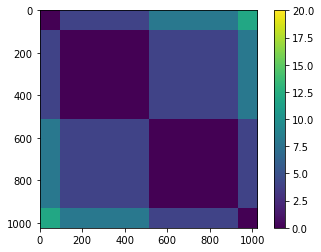

In [54]:
plt.imshow(np.abs(wij))
plt.colorbar()

In [9]:
L=10
H=Ham_nonint(L)
E_nonint,V= H.eigh()
wij_nonint = np.outer(E_nonint,np.ones(2**L))-np.outer(np.ones(2**L),E_nonint)

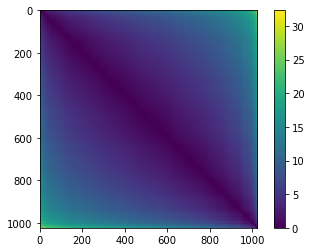

In [11]:
plt.imshow(np.abs(wij_nonint))
plt.colorbar()

### Color plots of $<n|\partial_{\lambda}H|m>$

In [55]:
L=10
H=Ham_int(L)
E_int,V_int= H.eigh()
op_lamb= del_lambda_Ham(L)
num_lamb = np.dot(V_int,np.dot(op_lamb.toarray(),np.conj(V_int)))

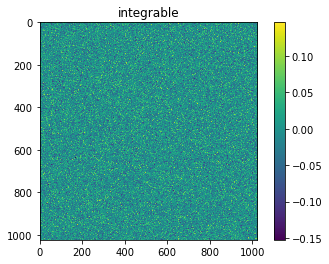

In [56]:
plt.imshow(np.real(num_lamb))
plt.colorbar()
plt.title("integrable")

In [58]:
L=10
H=Ham_nonint(L)
E_nonint,V_nonint= H.eigh()
op_lamb= del_lambda_Ham(L)
num_lamb_nonint = np.dot(V_nonint,np.dot(op_lamb.toarray(),np.conj(V_nonint)))

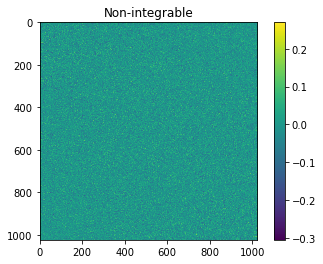

In [59]:
plt.imshow(np.real(num_lamb_nonint))
plt.colorbar()
plt.title("Non-integrable")

### Histogram of $\partial_{\lambda}H^{ij}$

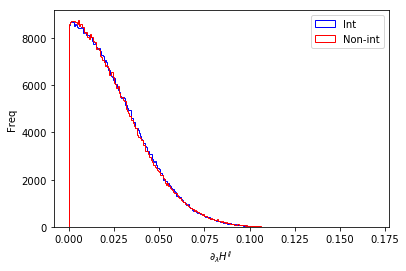

In [57]:
index_lower = np.tril_indices(2**L,-1)
count, bins, ignored = plt.hist(np.abs(num_lamb[index_lower]),'auto', color='b',histtype='step', label='Int')
count_nonint, bins_nonint, ignored_nonint = plt.hist(np.abs(num_lamb_nonint[index_lower]),'auto', color='r',histtype='step', label='Non-int')
plt.ylabel(r'Freq')
plt.xlabel(r'$\partial_{\lambda}H^{ij}$')
plt.legend()

In [89]:
def guage_potent_mu_dries(Ham,L):
    E,V= Ham.eigh()
    op_lamb= del_lambda_Ham(L)
    wij = np.outer(E,np.ones(2**L))-np.outer(np.ones(2**L),E)
    wij=wij+ np.spacing(1)*np.identity(2**L)
    num_lamb = np.dot(V,np.dot(op_lamb.toarray(),np.conj(V)))
    A_lamb = -1j*num_lamb/wij
    return A_lamb

In [91]:
mu=np.sqrt(np.spacing(1))
Ntot=11
length=np.zeros(Ntot-2)
norm_arr_int=np.zeros(Ntot-2)
for i in range(2,Ntot):
    L=i
    length[i-2]=i
    H=Ham_int(L)
    A_lamb=guage_potent_mu(H,L,mu)
    norm_arr_int[i-2]=norm(A_lamb)
    print length[i-2],norm_arr_int[i-2]

2.0 0.353553390593
3.0 7.30324930203
4.0 17.604817959
5.0 57.9871838763
6.0 51.447714088
7.0 301.665673534
8.0 140.468953464
9.0 285.552733097
10.0 582.641753138


In [81]:
mu=np.sqrt(np.spacing(1))
Ntot=11
length=np.zeros(Ntot-2)
norm_arr_nonint=np.zeros(Ntot-2)
for i in range(2,Ntot):
    L=i
    length[i-2]=i
    H=Ham_nonint(L)
    A_lamb=guage_potent_mu(H,L,mu)
    norm_arr_nonint[i-2]=norm(A_lamb)
    print length[i-2],norm_arr_nonint[i-2]

2.0 0.521731066043
3.0 3.48944179833
4.0 17.5618973817
5.0 32.6846248678
6.0 72.2436402534
7.0 484.079236233
8.0 563.915240796
9.0 7755.66465166
10.0 6426.3789002


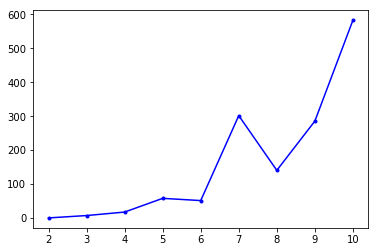

In [92]:
plt.plot(length, norm_arr_int, 'b.-', label="Int")
#plt.plot(length,0.05* length**2, 'b-', label="Int")
#plt.plot(length, norm_arr_nonint, 'r', label="Non-int")

In [88]:
L=2
np.identity(2**L)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])